,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


None

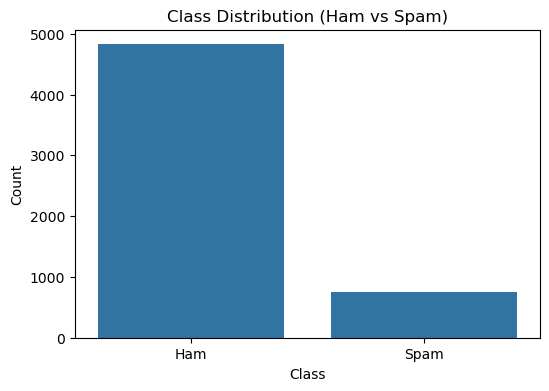

C:\Users\ranji\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8503 - loss: 0.3644 - val_accuracy: 0.9794 - val_loss: 0.0922
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9924 - loss: 0.0357 - val_accuracy: 0.9830 - val_loss: 0.0767
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9985 - loss: 0.0063 - val_accuracy: 0.9821 - val_loss: 0.0859
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9999 - loss: 0.0017 - val_accuracy: 0.9803 - val_loss: 0.1005
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 1.0000 - loss: 9.0086e-04 - val_accuracy: 0.9830 - val_loss: 0.1070
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 1.0000 - loss: 2.5518e-04 - val_accuracy: 0.9830 - val_loss: 0.1110
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 1.0000 - loss: 1.9748e-04 - val_accuracy: 0.9821 - val_loss: 0.1174
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 1.0000 - loss: 9.335

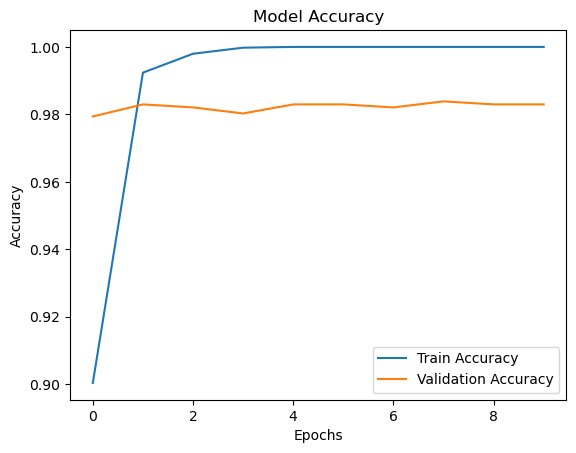

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Model Accuracy: 0.9830
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       965
        Spam       0.97      0.90      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[0.9964194297790527, 'spam']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[4.199449321617976e-08, 'ham']


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\ranji\OneDrive\Desktop\MS Spam Collection Dataset\spam.csv"
df = pd.read_csv(file_path, encoding="latin-1")

# Display basic dataset information
display(df.head())
display(df.info())

df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Encode labels (ham=0, spam=1)
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Visualizing class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['label'])
plt.title("Class Distribution (Ham vs Spam)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0,1], labels=['Ham', 'Spam'])
plt.show()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Convert text into TF-IDF features
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

# Build the Neural Network model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_tfidf, y_train, epochs=10, batch_size=32, validation_data=(X_test_tfidf, y_test))

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model
y_pred = (model.predict(X_test_tfidf) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

# Function to predict message type
def predict_message(message):
    message_tfidf = vectorizer.transform([message]).toarray()
    prediction = model.predict(message_tfidf)[0][0]
    label = "spam" if prediction > 0.5 else "ham"
    return [float(prediction), label]

# Test the function
print(predict_message("Congratulations! You won a free lottery. Call now!"))  # Expected output: Spam
print(predict_message("Hey, are we meeting at 5 PM?"))  # Expected output: Ham